In [125]:
import geopandas as gpd
import pandas as pd

In [126]:
path_shp_credito_2022 = 'G:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/PROYECTO AREA LIBERACION/SHP/LOTES_CREDITO_2022.shp'
path_shp_credito_2023 = 'G:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/PROYECTO AREA LIBERACION/SHP/LOTES_CREDITO_2023.shp'

In [127]:
shp_credito_2022 = gpd.read_file(path_shp_credito_2022)
shp_credito_2023 = gpd.read_file(path_shp_credito_2023)

In [128]:
shp_credito_2023 = shp_credito_2023.to_crs(epsg=32720)

<AxesSubplot:>

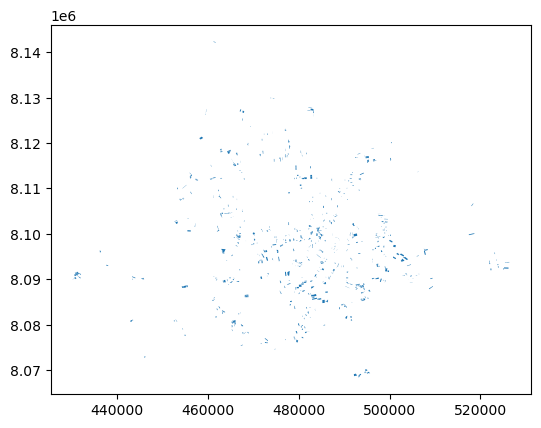

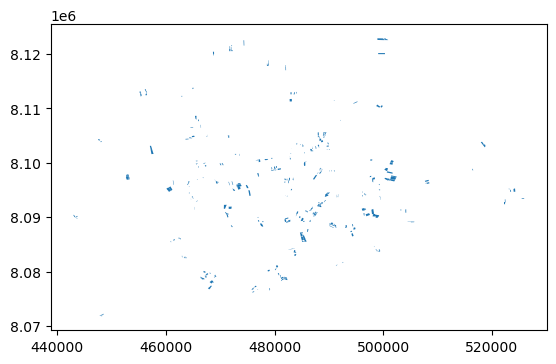

In [129]:
shp_credito_2022.plot()
shp_credito_2023.plot()

## Data credito 2022

In [130]:
shp_credito_2022.columns

Index(['id', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'variedad', 'fs', 'soca', 'cultivo', 'zona', 'area', 'fc', 'fsi',
       'estado', 'dias', 'geometry'],
      dtype='object')

In [131]:
shp_credito_2022['area'].sum()

3779.69

In [132]:
credito_2022 = shp_credito_2022[['unidad_01','unidad_02','unidad_03','unidad_04','unidad_05','variedad','soca','area', 'fc','geometry']]
credito_2022 = credito_2022.rename(columns={'unidad_01':'cod_prop','unidad_02':'nom_prop','unidad_03':'cod_ca','unidad_04':'nom_ca','unidad_05':'lote','variedad':'variedad','soca':'soca','area':'area', 'fc':'fecha_ini'})
credito_2022['soca'] = 1

In [133]:
credito_2022.head(3)

,cod_prop,nom_prop,cod_ca,nom_ca,lote,variedad,soca,area,fecha_ini,geometry
0,18,LAS_MARAS_FRERKING,18088,FRERKING_ORTIZ_RICARDO,L3.1,RB-2,1,1.63,2023-05-22,"POLYGON Z ((485394.788 8089523.355 0.000, 4853..."
1,883,P-056_COOP.AGRIC.DE_P.GUALBERTO_VILLARROEL,30754,MONTERO_FRANCISCA_MERCADO_VDA_DE,L12.2,UCG_90-20,1,1.49,2023-07-31,"POLYGON Z ((488883.546 8109932.896 0.000, 4888..."
2,222,POTRERITO,8814,MURIALDO_MENDEZ_WALTER_DANIEL,L18.1,CITTCA_85-22,1,7.40,2023-06-04,"POLYGON Z ((475914.478 8087291.392 0.000, 4759..."


## Data credito 2023

In [134]:
shp_credito_2023.columns

Index(['estado_2da', 'cod', 'nombre', 'cod_prop', 'nom_prop', 'lote',
       'superficie', 'textura', 'variedad_s', 'fecha_siem', 'estado_de_',
       'amigo_id', 'geometry'],
      dtype='object')

In [135]:
shp_credito_2023['superficie'].sum()

2309.83

In [136]:
shp_credito_2023['soca'] = 0

In [137]:
credito_2023 = shp_credito_2023[['cod_prop','nom_prop','cod','nombre','lote','variedad_s','soca','superficie', 'fecha_siem','geometry']]
credito_2023 = credito_2023.rename(columns={'cod_prop':'cod_prop','nom_prop':'nom_prop','cod':'cod_ca','nombre':'nom_ca','lote':'lote','variedad_s':'variedad','soca':'soca','superficie':'area', 'fecha_siem':'fecha_ini'})

In [138]:
credito_2023.head(3)

,cod_prop,nom_prop,cod_ca,nom_ca,lote,variedad,soca,area,fecha_ini,geometry
0,98,TERRANOVA--ESPINOZA,2662,DON SERAFIN SRL.,L12.1,UCG 90-20,0,2.51,2023-05-30,"POLYGON ((482311.366 8096736.028, 482237.113 8..."
1,1714,PENOCO--DAVALOS MARIO,2765,DAVALOS GUARISTI MARIO,L3,UCG 90-20,0,0.91,2023-06-07,"POLYGON ((491013.567 8111437.874, 490968.584 8..."
2,1762,NARANJO--ACUÃ‘A VICTORIANO,41529,ACUÃ‘A CANO VICTORIANO,L2.3,UCG 90-20,0,0.40,2023-04-25,"POLYGON ((467607.346 8105140.471, 467660.739 8..."


In [139]:
df_shp = pd.concat([credito_2022, credito_2023])

In [140]:
df_shp['dias'] = 0

In [141]:
df_shp

,cod_prop,nom_prop,cod_ca,nom_ca,lote,variedad,soca,area,fecha_ini,geometry,dias
0,18,LAS_MARAS_FRERKING,18088,FRERKING_ORTIZ_RICARDO,L3.1,RB-2,1,1.63,2023-05-22,"POLYGON Z ((485394.788 8089523.355 0.000, 4853...",0
1,883,P-056_COOP.AGRIC.DE_P.GUALBERTO_VILLARROEL,30754,MONTERO_FRANCISCA_MERCADO_VDA_DE,L12.2,UCG_90-20,1,1.49,2023-07-31,"POLYGON Z ((488883.546 8109932.896 0.000, 4888...",0
2,222,POTRERITO,8814,MURIALDO_MENDEZ_WALTER_DANIEL,L18.1,CITTCA_85-22,1,7.40,2023-06-04,"POLYGON Z ((475914.478 8087291.392 0.000, 4759...",0
3,1260,SAN_JUAN_DE_MAROTAS--DURAN_LIDIA,41866,JALDIN_DURAN_JUAN_PABLO,L4,UCG_90-20,1,7.54,2023-07-21,"POLYGON Z ((464606.201 8118158.151 0.000, 4646...",0
4,33,SANTA_ANA--VICENTE_ROCA_GIL,633,AGROP._VICENTE_ROCA_GIL_SRL,L4.2,UCG_90-20,1,14.30,2023-07-11,"POLYGON Z ((507852.773 8096528.155 0.000, 5083...",0
...,...,...,...,...,...,...,...,...,...,...,...
345,555,LOMAS DE BIBOSI-SAN MIGUEL--ANTONIETA COLAMARINO,751,AGROPECUARIA DON DOMENICO,L18.1,CITTCA 85-22,0,4.56,2023-05-16,"POLYGON ((479570.787 8098866.767, 479553.734 8...",0
346,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L31,UCG 90-20,0,0.56,2023-04-27,"POLYGON ((482824.992 8100962.083, 482789.571 8...",0
347,509,NATIVIDAD--CLAROS,1977,CLAROS CADIMA NATIVIDAD,L6.1,UCG 90-20,0,1.10,2023-05-11,"POLYGON ((491689.703 8093955.963, 491646.681 8...",0
348,1865,OKINAWA 400--CONDORI RUDDY,42178,CONDORI ORELLANA RUDDY,L1,UCG 90-20,0,5.34,2023-04-25,"POLYGON ((525911.179 8093474.766, 525911.460 8...",0


<AxesSubplot:>

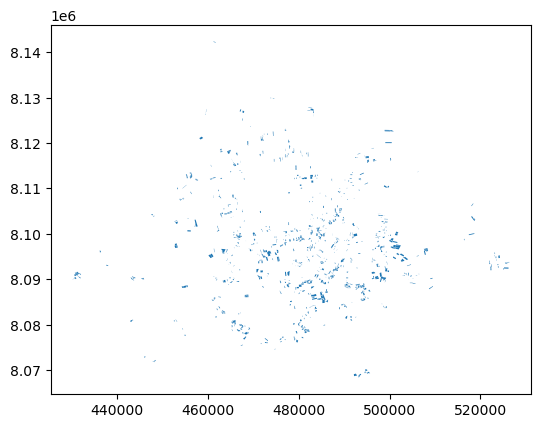

In [142]:
df_shp.plot()

In [143]:
df_shp.to_file("LOTES_LIBERACION.shp", driver="ESRI Shapefile")